In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

Text(0.5, 0.917, 'Correlation 94.7% (r=0.947091)')

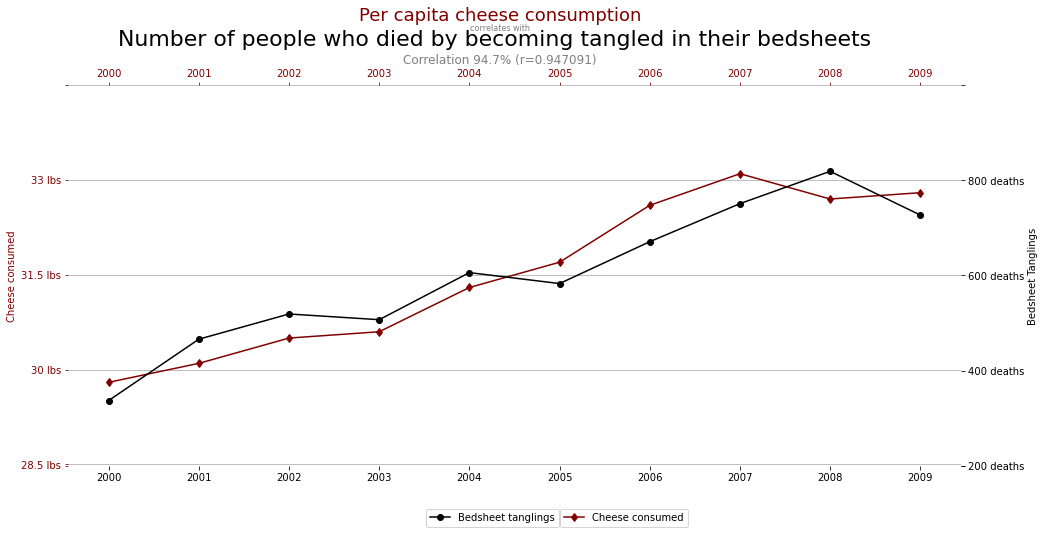

In [237]:
df = pd.DataFrame({'Year':[i for i in range(2000,2010)],
                  'cheese_consumption':[29.8,30.1,30.5,30.6,31.3,31.7,32.6,33.1,32.7,32.8],
                  'deaths':[327,456,509,497,596,573,661,741,809,717]})
years = [i for i in range(2000,2010)]

plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = False


fig, ax = plt.subplots(figsize=(16,7))


plt.grid(axis='y')
ax.plot(df['Year'],df['cheese_consumption'],marker='d', color='maroon',label='Cheese consumed')
ax.set_xticks(years)
labels=['','28.5 lbs','30 lbs','31.5 lbs','33 lbs',' ']
ax.set_yticks([28.48,28.5,30,31.5,33,34.5]) 
ax.set_yticklabels(labels)
ax.tick_params(axis='y',colors='maroon')
ax.yaxis.label.set_color('maroon')
ax.set_ylabel('Cheese consumed')


ax2 = ax.twinx()
ax3 = ax2.twiny()
ax3.set_xticks(years)
ax3.tick_params(axis='x', colors='maroon')
ax3.plot(df['Year'],df['deaths'],marker='o', color='k',label='Bedsheet tanglings')

ax3.set_yticks([189.9,190,390,590,790,990])
ax2.set_yticks([189.9,190,390,590,790,990])


ax2.set_yticklabels(['','200 deaths','400 deaths','600 deaths','800 deaths',''])
ax2.set_xticks(years)
ax2.set_ylabel('Bedsheet Tanglings')

ax.legend(bbox_to_anchor=(0.7, -0.1))
ax3.legend(bbox_to_anchor=(0.555, -0.1))


#fig.suptitle('This sentence is\nbeing split\ninto three lines')


fig.text(0.5,1,"Per capita cheese consumption", ha="center", va="bottom", size=18,color="maroon")
fig.text(0.5,0.985,"correlates with", ha="center", va="bottom", size=8,color="grey")
fig.text(0.495,0.95,"Number of people who died by becoming tangled in their bedsheets", ha="center", va="bottom", size=22,color="black")
fig.text(0.5,0.917,"Correlation 94.7% (r=0.947091)", ha="center", va="bottom", size=12,color="grey")

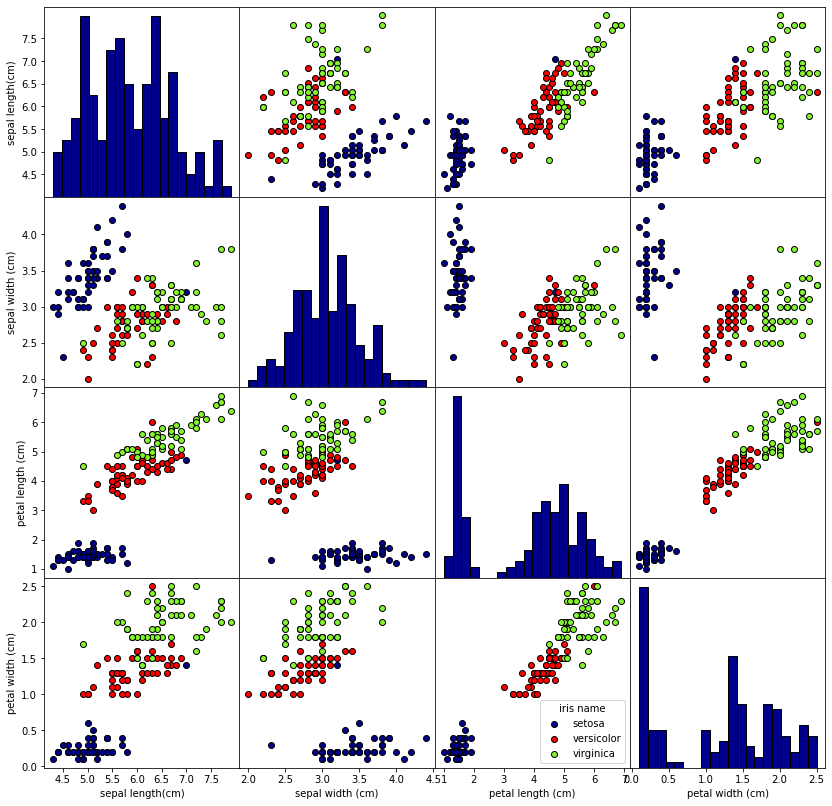

In [63]:
iris = datasets.load_iris()
data = iris['data']
data[:,0]


plt.rcParams['axes.spines.left'] = True
plt.rcParams['axes.spines.right'] = True
plt.rcParams['axes.spines.top'] = True
plt.rcParams['axes.spines.bottom'] = True


fig,ax = plt.subplots(4,4,figsize=(14,14))
names =  ['sepal length(cm)','sepal width (cm)', 'petal length (cm)','petal width (cm)']


for i in range(0,len(ax)):
    for j in range(len(ax)):
        if i == j :
            if j != 0:
                ax[i][j].set_yticks([])
            else:
                ax[i][j].set_ylabel(names[i])
            if i != 3:
                ax[i][j].set_xticks([])
            else:
                ax[i][j].set_xlabel(names[i])
            ax[i][j].hist(data[:,i],edgecolor = "black",bins=20,color='#00008B')
        else:

            if j != 0:
                ax[i][j].set_yticks([])
            else:
                ax[i][j].set_ylabel(names[i])
            if i != 3:
                ax[i][j].set_xticks([])
            else:
                ax[i][j].set_xlabel(names[j])
                
            color_list = ['#00008B','r','#83f52c']
            label_list = ['setosa','versicolor','virginica']
            ind_list = [[0,51],[51,101],[101,151]]
            
            for k in range(3):
                ax[j][i].scatter(data[ind_list[k][0]:ind_list[k][1],i],data[ind_list[k][0]:ind_list[k][1],j],color=color_list[k],edgecolors='black',label=label_list[k])
            

            
ax[0][0].set_yticks([2,4,6,8,10,12,14])
ax[0][0].set_yticklabels(['4.5','5.0','5.5','6.0','6.5','7.0','7.5'])

ax[1][0].set_yticks([i for i in np.arange(2,4.5,0.5)])

ax[3][0].set_xticks([i for i in np.arange(4.5,8,0.5)])

ax[3][2].set_xticks([i for i in range(1,8)])
ax[3][2].legend(loc='lower right',title='iris name')
plt.subplots_adjust(wspace=0, hspace=0)

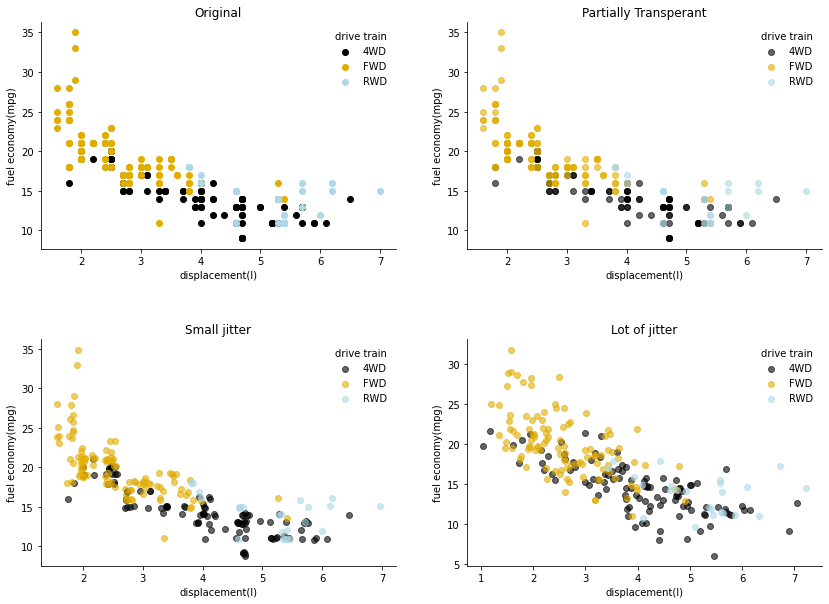

In [47]:
url = 'https://raw.githubusercontent.com/pratoolbharti/NIU/master/Applied_Machine_Learning_S20/Homework-1/mpg.csv'
df = pd.read_csv(url,header=0,index_col=0)
df_sorted = df.sort_values('drv',axis=0)

def rand_jitter(arr,sd):
    stdev = sd * (max(arr) - min(arr))
    return arr + np.random.randn(len(arr)) * stdev

plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False


fig, ax = plt.subplots(2,2,figsize=(14,10))

alpha_list=[1,0.6,0.6,0.6]
sd_list = [0,0,0.01,0.10]
titles = ['Original','Partially Transperant','Small jitter','Lot of jitter']
counter=0
for k in range(len(ax)):
    for j in range(len(ax)):
        l1 = [[0,103],[103,210],[210,235]]
        color_list = ['k','#E1AD01','#ADD8E6']
        label_list = ['4WD','FWD','RWD']
        for i in range(3):
            ax[k][j].scatter(rand_jitter(df_sorted['displ'][l1[i][0]:l1[i][1]],sd_list[counter]),
                             rand_jitter(df_sorted['cty'][l1[i][0]:l1[i][1]],sd_list[counter]),
                            color=color_list[i],label=label_list[i],alpha=alpha_list[counter])
    
        ax[k][j].legend(frameon=False,title='drive train')
        ax[k][j].set_ylabel('fuel economy(mpg)')
        ax[k][j].set_xlabel('displacement(l)') 
        ax[k][j].set_title(titles[counter])
        counter=counter+1

plt.subplots_adjust(hspace=0.4)